In [13]:
#import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [3]:
rfm= pd.read_csv('rfm_uk.csv')
rfm.head()

,Unnamed: 0.1,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet
0,0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321
1,261,261,12608.0,2010-10-31,404,0.791787,16,0.802755,415.790000,0.248767,331
2,397,397,12745.0,2010-08-10,486,0.874511,23,0.722751,308.470000,0.435470,332
3,398,398,12746.0,2010-06-17,540,0.902483,17,0.790342,254.550000,0.551777,332
4,399,399,12747.0,2011-12-07,2,0.031202,249,0.132801,342.249231,0.359633,111


In [4]:
### splitting the columns
rfm['recency_groups']= rfm['rec_freq_monet'].astype('string').str.slice(0,1,1)
rfm['frequency_groups']= rfm['rec_freq_monet'].astype('string').str.slice(1,2,1)
rfm['monetary_groups']= rfm['rec_freq_monet'].astype('string').str.slice(2,3,1)

rfm.head()

,Unnamed: 0.1,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups
0,0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,3,2,1
1,261,261,12608.0,2010-10-31,404,0.791787,16,0.802755,415.790000,0.248767,331,3,3,1
2,397,397,12745.0,2010-08-10,486,0.874511,23,0.722751,308.470000,0.435470,332,3,3,2
3,398,398,12746.0,2010-06-17,540,0.902483,17,0.790342,254.550000,0.551777,332,3,3,2
4,399,399,12747.0,2011-12-07,2,0.031202,249,0.132801,342.249231,0.359633,111,1,1,1


In [5]:
value_map= {'1':'3','3':'1','2':'2'}


rfm['recency_groups']= rfm['recency_groups'].map(value_map)
rfm['frequency_groups']= rfm['frequency_groups'].map(value_map)
rfm['monetary_groups']= rfm['monetary_groups'].map(value_map)

rfm.head()

,Unnamed: 0.1,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups
0,0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,1,2,3
1,261,261,12608.0,2010-10-31,404,0.791787,16,0.802755,415.790000,0.248767,331,1,1,3
2,397,397,12745.0,2010-08-10,486,0.874511,23,0.722751,308.470000,0.435470,332,1,1,2
3,398,398,12746.0,2010-06-17,540,0.902483,17,0.790342,254.550000,0.551777,332,1,1,2
4,399,399,12747.0,2011-12-07,2,0.031202,249,0.132801,342.249231,0.359633,111,3,3,3


In [6]:
rfm['overall_score']= (rfm['recency_groups'].astype('int64')+rfm['frequency_groups'].astype('int64')+
                       rfm['monetary_groups'].astype('int64'))

rfm.head()

,Unnamed: 0.1,Unnamed: 0,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet,recency_groups,frequency_groups,monetary_groups,overall_score
0,0,0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,321,1,2,3,6
1,261,261,12608.0,2010-10-31,404,0.791787,16,0.802755,415.790000,0.248767,331,1,1,3,5
2,397,397,12745.0,2010-08-10,486,0.874511,23,0.722751,308.470000,0.435470,332,1,1,2,4
3,398,398,12746.0,2010-06-17,540,0.902483,17,0.790342,254.550000,0.551777,332,1,1,2,4
4,399,399,12747.0,2011-12-07,2,0.031202,249,0.132801,342.249231,0.359633,111,3,3,3,9


In [8]:
retail= pd.read_csv('retail_uk.csv')
retail.head()

,Unnamed: 0.1,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
ltv= retail.groupby('Customer ID')['Revenue'].sum().reset_index()
ltv.columns=['Customer ID','ltv']

ltv.head()

,Customer ID,ltv
0,12346.0,77556.46
1,12608.0,415.79
2,12745.0,723.85
3,12746.0,254.55
4,12747.0,8898.48


<AxesSubplot:ylabel='Frequency'>

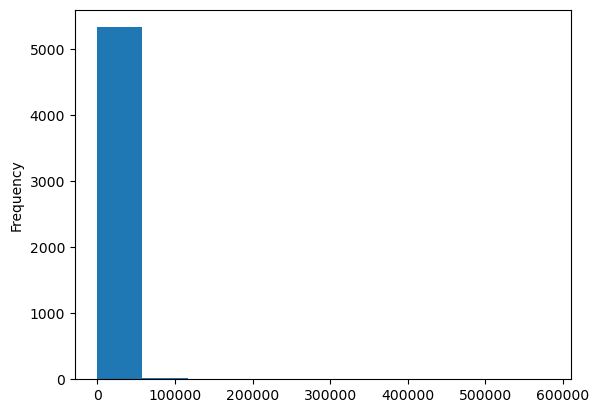

In [10]:
ltv.ltv.plot(kind='hist')

<AxesSubplot:ylabel='ltv'>

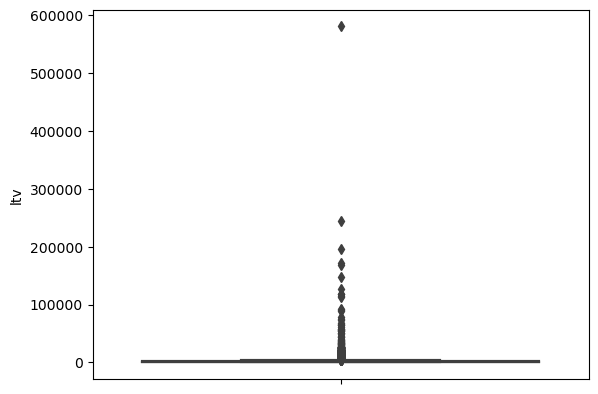

In [12]:
sns.boxplot(y='ltv',data=ltv)

#len(ltv)-len(outliers_removed)
outliers_removed= ltv[ltv.ltv <= ltv.ltv.quantile(0.99)]

sns.boxplot(y='ltv',data=outliers_removed)

In [14]:
km= KMeans(n_clusters=3,n_init=10,max_iter=300)

In [15]:
fitting= km.fit_predict(outliers_removed[['ltv']])

In [20]:
outliers_removed['clusters']=fitting

outliers_removed.groupby('clusters')['ltv'].mean()

outliers_removed['clusters']=outliers_removed['clusters'].astype('string')

outliers_removed.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_98976\4204647473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=fitting
C:\Users\Dell\AppData\Local\Temp\ipykernel_98976\4204647473.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=outliers_removed['clusters'].astype('string')


,Customer ID,ltv,clusters
1,12608.0,415.79,2
2,12745.0,723.85,2
3,12746.0,254.55,2
4,12747.0,8898.48,0
6,12749.0,6897.36,0


In [21]:
ltv_mapping= {'0':'Low_ltv','1': 'Mid_ltv','2':'High_ltv'}


outliers_removed['clusters']=outliers_removed['clusters'].map(ltv_mapping)

outliers_removed.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_98976\2102467983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_removed['clusters']=outliers_removed['clusters'].map(ltv_mapping)


,Customer ID,ltv,clusters
1,12608.0,415.79,High_ltv
2,12745.0,723.85,High_ltv
3,12746.0,254.55,High_ltv
4,12747.0,8898.48,Low_ltv
6,12749.0,6897.36,Low_ltv


In [22]:
rfm.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Customer ID', 'last_date', 'recency',
       'rank_recency', 'frequency', 'freq_ranking', 'monetary', 'rank_monet',
       'rec_freq_monet', 'recency_groups', 'frequency_groups',
       'monetary_groups', 'overall_score'],
      dtype='object')

In [23]:
rfm_data= rfm.loc[:,['Customer ID','recency','frequency','monetary','recency_groups',
                     'frequency_groups', 'monetary_groups','overall_score']]


joined_data= pd.merge(outliers_removed[['Customer ID','clusters']],rfm_data,
                      how='left',on= 'Customer ID')


joined_data.drop('Customer ID',axis=1,inplace=True)

joined_data.head()

,clusters,recency,frequency,monetary,recency_groups,frequency_groups,monetary_groups,overall_score
0,High_ltv,404,16,415.790000,1,1,3,5
1,High_ltv,486,23,308.470000,1,1,2,4
2,High_ltv,540,17,254.550000,1,1,2,4
3,Low_ltv,2,249,342.249231,3,3,3,9
4,Low_ltv,3,338,766.373333,3,3,3,9


In [24]:
#split X,y
X_1= pd.get_dummies(joined_data.drop('clusters',axis=1))
columns=X_1.columns
X=X_1.values

y= joined_data['clusters'].values

In [25]:
model_tree= DecisionTreeClassifier()

In [26]:
cv= RepeatedStratifiedKFold(n_splits=3,n_repeats=3,random_state=1)

In [27]:
scores= cross_val_score(model_tree,X,y,scoring='accuracy',cv=cv)

scores.mean()

0.8623013856157541

In [28]:
param_dist = {"max_depth": [3, None],
          
           "min_samples_leaf": range(1,9),
             "criterion": ["gini", "entropy"]}

In [29]:
tree= DecisionTreeClassifier()
rf= RandomForestClassifier()

tree_cv= RandomizedSearchCV(tree,param_dist,cv=5)
rf_cv= RandomizedSearchCV(rf, param_dist,cv=5)

In [30]:
tree_cv.fit(X,y)

rf_cv.fit(X,y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'min_samples_leaf': range(1, 9)})

In [31]:
print(tree_cv.best_score_)
print(rf_cv.best_score_)

0.8931888395959163
0.8999821832629573


In [33]:
prediction=rf_cv.predict(X)
prediction

array(['High_ltv', 'High_ltv', 'High_ltv', ..., 'High_ltv', 'High_ltv',
       'Low_ltv'], dtype=object)

In [34]:
comparison_data= pd.DataFrame({'Actual': y,'Prediction':prediction})


comparison_data.groupby(['Actual','Prediction'])['Actual','Prediction'].size().reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_98976\4025303744.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  comparison_data.groupby(['Actual','Prediction'])['Actual','Prediction'].size().reset_index()


,Actual,Prediction,0
0,High_ltv,High_ltv,4334
1,High_ltv,Low_ltv,112
2,High_ltv,Mid_ltv,1
3,Low_ltv,High_ltv,210
4,Low_ltv,Low_ltv,487
5,Low_ltv,Mid_ltv,12
6,Mid_ltv,High_ltv,25
7,Mid_ltv,Low_ltv,77
8,Mid_ltv,Mid_ltv,41
